# Forecasting Monthly Champagne Sales using Arima Model


In [17]:
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [18]:
#setting working directory
os.chdir('C:/Users/sagar/Documents/Jobs related/Projects')

In [19]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [20]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [21]:
#dropping columns 105 & 106 since they contain bad data
df.drop(105,axis=0,inplace=True)
df.drop(106,axis=0,inplace=True)

In [22]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [23]:
#renaming column names of monthly sales
df.columns=['Month','Sales per month' ]
df.head()

,Month,Sales per month
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [24]:
#converting month column to date time format
df['Month']=pd.to_datetime(df['Month'])
df.head()

,Month,Sales per month
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [25]:
#setting index as Month
df.set_index('Month',inplace=True)
df.head()

,Sales per month
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


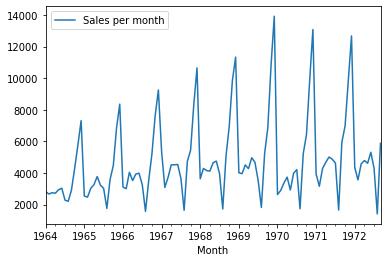

In [26]:
#plotting the dataframe
df.plot()

In [27]:
#building arima model
model=sm.tsa.statespace.SARIMAX(df['Sales per month'],order=(1, 0, 0),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\sagar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


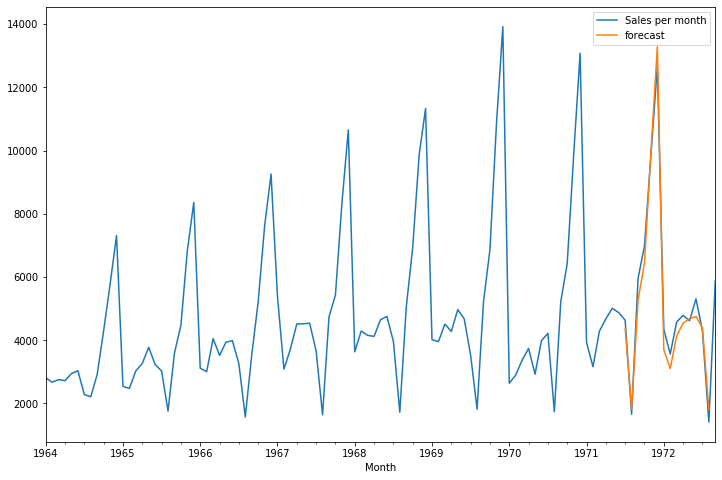

In [28]:
#forecasting present results to check
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales per month','forecast']].plot(figsize=(12,8))

In [30]:
#creating future dataset with 24 months values as NaN
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_df

,Sales per month,forecast
1972-10-01,NaN,NaN
1972-11-01,NaN,NaN
1972-12-01,NaN,NaN
1973-01-01,NaN,NaN
1973-02-01,NaN,NaN
1973-03-01,NaN,NaN
1973-04-01,NaN,NaN
1973-05-01,NaN,NaN
1973-06-01,NaN,NaN
1973-07-01,NaN,NaN


In [32]:
#merging future_df and df
future=pd.concat([df,future_df])
future.head()

,Sales per month,forecast
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN


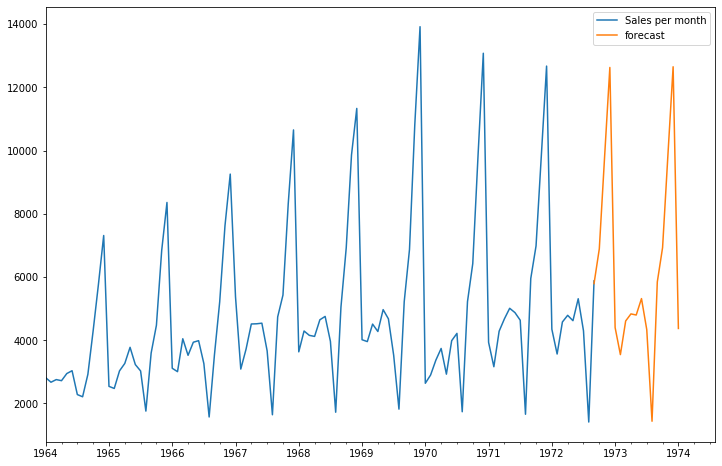

In [33]:
#forecasting future values
future['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future[['Sales per month', 'forecast']].plot(figsize=(12, 8))

Thank You!!!!!